In [1]:
import graphlab

In [3]:
sales = graphlab.SFrame('course-2/kc_house_data.gl/')


In [4]:
import numpy as np

In [5]:
def get_numpy_data(data_sframe, features, output):
    data_sframe['constant'] = 1 # add a constant column to an SFrame
    # prepend variable 'constant' to the features list
    features = ['constant'] + features
    # select the columns of data_SFrame given by the ‘features’ list into the SFrame ‘features_sframe’
    features_sframe = data_sframe[features]
    # this will convert the features_sframe into a numpy matrix with GraphLab Create >= 1.7!!
    features_matrix = features_sframe.to_numpy()
    # assign the column of data_sframe associated with the target to the variable ‘output_sarray’
    output_sarray = data_sframe[output]
    # this will convert the SArray into a numpy array:
    output_array = output_sarray.to_numpy() # GraphLab Create>= 1.7!!
    return(features_matrix, output_array)

In [6]:
def predict_outcome(feature_matrix, weights):
    predictions = np.dot(feature_matrix, weights)
    return(predictions)

In [7]:
def feature_derivative_ridge(errors, feature, weight, l2_penalty, feature_is_constant):
    
    if feature_is_constant:
         derivative = 2*np.dot(errors,feature)
    else:
        derivative = 2*np.dot(errors,feature)+2*l2_penalty*weight
    return derivative

In [9]:
(example_features, example_output) = get_numpy_data(sales, ['sqft_living'], 'price') 
my_weights = np.array([1., 10.])
test_predictions = predict_outcome(example_features, my_weights) 
errors = test_predictions - example_output # prediction errors

# next two lines should print the same values
print feature_derivative_ridge(errors, example_features[:,1], my_weights[1], 1, False)
print np.sum(errors*example_features[:,1])*2+20.
print ''

# next two lines should print the same values
print feature_derivative_ridge(errors, example_features[:,0], my_weights[0], 1, True)
print np.sum(errors)*2.

-5.65541667824e+13
-5.65541667824e+13

-22446749336.0
-22446749336.0


In [23]:
def ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size, l2_penalty, max_iterations=100):
    weights = np.array(initial_weights) # make sure it's a numpy arraY
    iter= 0
    while iter<max_iterations:
        gradient_sum_squares = 0
    #while not reached maximum number of iterations:
        # compute the predictions based on feature_matrix and weights using your predict_output() function
        # compute the errors as predictions - output
        for i in xrange(len(weights)): 
            # loop over each weight
            # Recall that feature_matrix[:,i] is the feature column associated with weights[i]
            # compute the derivative for weight[i].
            #(Remember: when i=0, you are computing the derivative of the constant!)
            if i==0:
                predictions = predict_outcome(feature_matrix,weights)
                error = predictions-output
                derivative = feature_derivative_ridge(error,feature_matrix[:,i],weights[i], l2_penalty, True)
            else:
                predictions = predict_outcome(feature_matrix,weights)
                error = predictions-output
                derivative = feature_derivative_ridge(error,feature_matrix[:,i],weights[i], l2_penalty, False)
            # subtract the step size times the derivative from the current weight
            weights[i]-=step_size*derivative
        iter+=1
    return weights

In [47]:
simple_features = ['sqft_living']
my_output = 'price'

In [48]:
train_data,test_data = sales.random_split(.8,seed=0)

In [49]:
(simple_feature_matrix, output) = get_numpy_data(train_data, simple_features, my_output)
(simple_test_feature_matrix, test_output) = get_numpy_data(test_data, simple_features, my_output)

In [50]:
initial_weights = np.array([0., 0.])
step_size = 1e-12
max_iterations=1000
l2_penalty =0.0

In [51]:
simple_weights_0_penalty = ridge_regression_gradient_descent(simple_feature_matrix, output, initial_weights, step_size, l2_penalty, 
                                                             max_iterations)

In [52]:
l2_penalty =1e11

In [53]:
simple_weights_high_penalty = ridge_regression_gradient_descent(simple_feature_matrix, output, initial_weights, step_size, l2_penalty,
                                                                max_iterations)

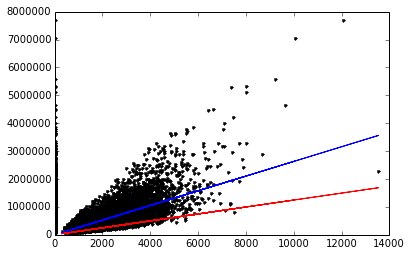

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(simple_feature_matrix,output,'k.',
         simple_feature_matrix,predict_outcome(simple_feature_matrix, simple_weights_0_penalty),'b-',
        simple_feature_matrix,predict_outcome(simple_feature_matrix, simple_weights_high_penalty),'r-')

In [55]:
simple_weights_0_penalty

array([ -1.63113505e-01,   2.63024369e+02])

In [56]:
simple_weights_high_penalty

array([   9.76730397,  124.57217379])

In [57]:
model_simple_weights_0_penalty_pred = predict_outcome(simple_test_feature_matrix,simple_weights_0_penalty)

In [58]:
model_simple_weights_high_penalty_pred=predict_outcome(simple_test_feature_matrix,simple_weights_high_penalty)

In [59]:
test_price = test_data['price'].to_numpy()

In [60]:
rss1 = (model_simple_weights_0_penalty_pred-test_price)*(model_simple_weights_0_penalty_pred-test_price)

In [61]:
rss2 = (model_simple_weights_high_penalty_pred-test_price)*(model_simple_weights_high_penalty_pred-test_price)

In [62]:
sum(rss2)

694642112109752.25

In [63]:
model_features = ['sqft_living', 'sqft_living15'] # sqft_living15 is the average squarefeet for the nearest 15 neighbors. 
my_output = 'price'
(feature_matrix, output) = get_numpy_data(train_data, model_features, my_output)
(test_feature_matrix, test_output) = get_numpy_data(test_data, model_features, my_output)

In [64]:
initial_weights = np.array([0.0,0.0,0.0])
step_size = 1e-12
max_iterations = 1000

In [65]:
l2_penalty = 0.0

In [66]:
multiple_weights_0_penalty = ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size, l2_penalty, 
                                                               max_iterations)

In [67]:
l2_penalty=1e11

In [68]:
multiple_weights_high_penalty = ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size, l2_penalty,
                                                                max_iterations)

In [69]:
multiple_weights_0_penalty

array([  -0.34072217,  243.1798087 ,   22.2779383 ])

In [70]:
multiple_weights_high_penalty

array([  6.74494255,  91.48927224,  78.43658701])

In [71]:
model_multiple_weights_high_penalty_pred=predict_outcome(test_feature_matrix,multiple_weights_high_penalty)

In [74]:
rss2_new = (model_multiple_weights_high_penalty_pred-test_price)*(model_multiple_weights_high_penalty_pred-test_price)

In [76]:
sum(rss2_new)

500404805946854.81

In [78]:
model_multiple_weights_0_penalty_pred = predict_outcome(test_feature_matrix,multiple_weights_0_penalty)

In [79]:
rss1_new = (model_multiple_weights_0_penalty_pred-test_price)*(model_multiple_weights_0_penalty_pred-test_price)

In [80]:
sum(rss1_new)

274073809224148.59

In [81]:
rss1_new

array([  5.99099466e+09,   1.32376261e+10,   4.23468113e+10, ...,
         3.39518100e+09,   4.10117762e+10,   1.72487348e+10])

In [82]:
rss2_new

array([  1.56392336e+09,   4.50481972e+10,   1.80037711e+07, ...,
         3.32935090e+10,   2.03528039e+09,   5.23356574e+10])